In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm

## Part 1: Data Cleaning 

We will use the `housing.csv` dataset , read into a pandas dataframe and visualize it to see the different features in the dataset as well as the shape of the dataset. 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


 Shape of dataset :  (20640, 10)


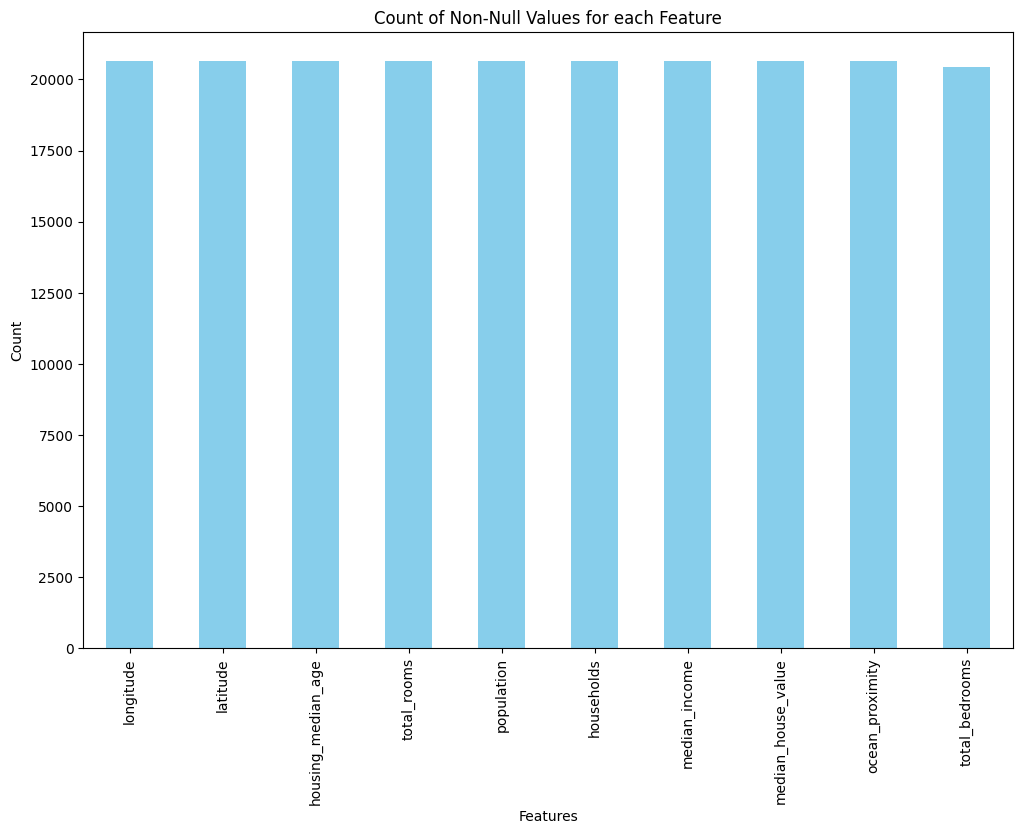

In [2]:
#Code here
dataset = pd.read_csv('housing.csv')
print(dataset.head())
print("\n\n Shape of dataset : ", dataset.shape)
plt.figure(figsize=(12, 8))
dataset.count().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Count of Non-Null Values for each Feature')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

In [3]:
#Code here
print("Count of Null Values :\n", dataset.isnull().sum())
dataset = dataset.dropna()


Count of Null Values :
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:
#Code here
print("\nShape of the cleaned dataset after removing Null values :", dataset.shape)
print("Count of Null Values after removal of Null Values:\n", dataset.isnull().sum())




Shape of the cleaned dataset after removing Null values : (20433, 10)
Count of Null Values after removal of Null Values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [5]:
#Code here
dataset['NEARBAY'] = dataset['ocean_proximity'].apply(lambda x: 1 if x == 'NEAR BAY' else 0)
dataset['<1H OCEAN'] = dataset['ocean_proximity'].apply(lambda x: 1 if x == '<1H OCEAN' else 0)
dataset['INLAND'] = dataset['ocean_proximity'].apply(lambda x: 1 if x == 'INLAND' else 0)
dataset['NEAROCEAN'] = dataset['ocean_proximity'].apply(lambda x: 1 if x == 'NEAR OCEAN' else 0)
dataset['ISLAND'] = dataset['ocean_proximity'].apply(lambda x: 1 if x == 'ISLAND' else 0)

print(dataset[3300:3400])

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3324    -122.89     38.93                20.0       1214.0           247.0   
3325    -122.83     38.96                15.0       1318.0           296.0   
3326    -122.77     38.92                26.0        712.0           140.0   
3327    -122.83     38.89                11.0        640.0           134.0   
3329    -122.74     38.83                12.0       4515.0           909.0   
...         ...       ...                 ...          ...             ...   
3422    -118.42     34.27                33.0       1209.0           341.0   
3423    -118.42     34.27                33.0        937.0           216.0   
3424    -118.42     34.27                35.0        674.0           153.0   
3425    -118.43     34.28                30.0       1384.0           308.0   
3426    -118.43     34.27                31.0       1130.0           276.0   

      population  households  median_income  median_house_value

 `Feature Normalization` using `StandardScaler` implemented by scratch.



In [6]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std_dev = None

    def fit(self, X):
        # Calculating the mean and standard deviation for each feature

        if isinstance(X, pd.DataFrame):
            numeric_X = X.select_dtypes(include=np.number)
            self.mean = numeric_X.mean()
            self.std_dev = numeric_X.std()
        else:
            self.mean = np.mean(X, axis=0)
            self.std_dev = np.std(X, axis=0)

    def transform(self, X):
        # Subtracting the mean and dividing by the standard deviation for each feature
        if isinstance(X, pd.DataFrame):
            numeric_X = X.select_dtypes(include=np.number)
            return (numeric_X - self.mean) / self.std_dev
        else:
            return (X - self.mean) / self.std_dev


In [7]:
#Code here
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value'] 

# Splitting the dataset into training and testing sets
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)


In [8]:
print(X_train.head())
print(y_train.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727  -1.112665  0.789562           -1.162112     0.812484        0.916334   
2057   -0.029603  0.471262            0.346805    -0.732406       -0.846899   
6453    0.753995 -0.708322           -0.288528     0.574069        0.735976   
4619    0.629219 -0.731726           -0.050278    -0.125616        0.975662   
15266   1.148290 -1.213857           -0.129695    -0.364945       -0.346169   

       population  households  median_income   NEARBAY  <1H OCEAN    INLAND  \
17727    1.123406    1.024241       0.437815 -0.353516   1.123266 -0.682697   
2057    -0.710326   -0.851253      -0.242439 -0.353516  -0.890217  1.464708   
6453     0.373323    0.678962      -0.109126 -0.353516  -0.890217  1.464708   
4619     1.177235    1.032088      -0.860722 -0.353516   1.123266 -0.682697   
15266   -0.108495   -0.249630      -0.169095 -0.353516  -0.890217 -0.682697   

       NEAROCEAN    ISLAND  
17727  -0.384177 -0.0

# Part 2: Linear Regression 

In [9]:
class LinearRegression:
    def __init__(self):
        self.learning_rate = 0.001
        self.num_of_iterations = 1000
        self.weights = None
        self.bias = None
        self.losses = []
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias =0

        for i in range (self.num_of_iterations):
            model =  np.dot(X, self.weights) + self.bias 
            dw = (1 / n_samples) * np.dot(X.T, (model - y))
            db = (1 / n_samples) * np.sum(model - y)
            self.weights = self.weights - self.learning_rate* dw
            self.bias = self.bias - self.learning_rate *db
            loss = self.mse(y, model)
            self.losses.append(loss)
            if i % 100 == 0:  # Printing loss every 100 iterations
                print(f"Iteration {i}: Loss = {loss}")
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        return y_hat
        
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2) 


Iteration 0: Loss = 55938786530.69681
Iteration 100: Loss = 48156248431.93716


Iteration 200: Loss = 41784061094.17538
Iteration 300: Loss = 36566631569.64822
Iteration 400: Loss = 32294688776.735817
Iteration 500: Loss = 28796888159.929325
Iteration 600: Loss = 25932937966.331074
Iteration 700: Loss = 23587971343.64299
Iteration 800: Loss = 21667938454.426678
Iteration 900: Loss = 20095833729.950195


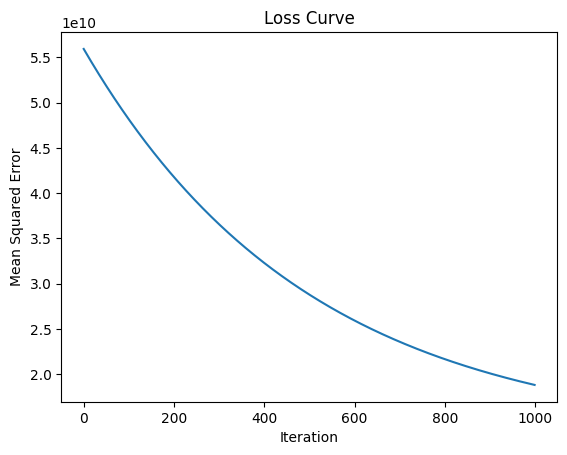

In [10]:
uni_train_X = X_train[['total_rooms']]

uni_test_X = X_test[['total_rooms']]

# Train model
lr = LinearRegression()
lr.fit(uni_train_X, y_train)

# Predict on testing data
y_pred = lr.predict(uni_test_X)

# Loss curve
plt.plot(range(lr.num_of_iterations), lr.losses)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

Iteration 0: Loss = 55938786530.69681
Iteration 100: Loss = 48188415558.15572
Iteration 200: Loss = 41843583369.99188
Iteration 300: Loss = 36649393873.95463
Iteration 400: Loss = 32397176680.397182
Iteration 500: Loss = 28916104017.37972
Iteration 600: Loss = 26066327927.962456
Iteration 700: Loss = 23733362044.74653
Iteration 800: Loss = 21823482236.132137
Iteration 900: Loss = 20259961350.7237


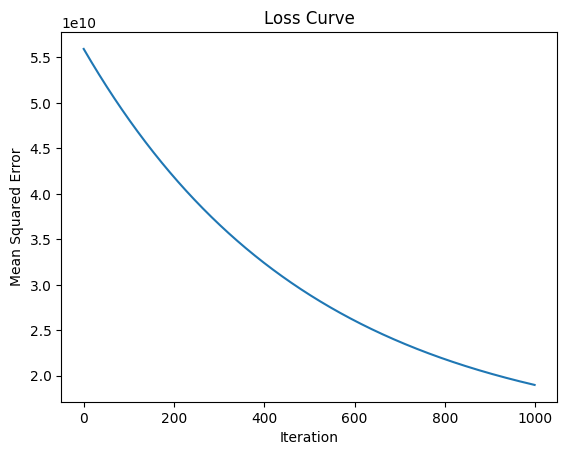

In [11]:
scaler = StandardScaler()
scaler.fit(X_train[['total_bedrooms']])
X_train_scaled = scaler.transform(X_train[['total_bedrooms']])

scaler.fit(X_test[['total_bedrooms']])
X_test_scaled = scaler.transform(X_test[['total_bedrooms']])

# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred = lr.predict(X_test_scaled)

# Loss curve
plt.plot(range(lr.num_of_iterations), lr.losses)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

# Part 3: Multivariate Regression 

Iteration 0: Loss = 55938786530.69681
Iteration 100: Loss = 46228734016.155304
Iteration 200: Loss = 38435595963.72086
Iteration 300: Loss = 32164079515.036247
Iteration 400: Loss = 27105274098.80282
Iteration 500: Loss = 23016281006.777348
Iteration 600: Loss = 19705134890.947853
Iteration 700: Loss = 17019470824.468452
Iteration 800: Loss = 14837906460.475601
Iteration 900: Loss = 13063428192.599607


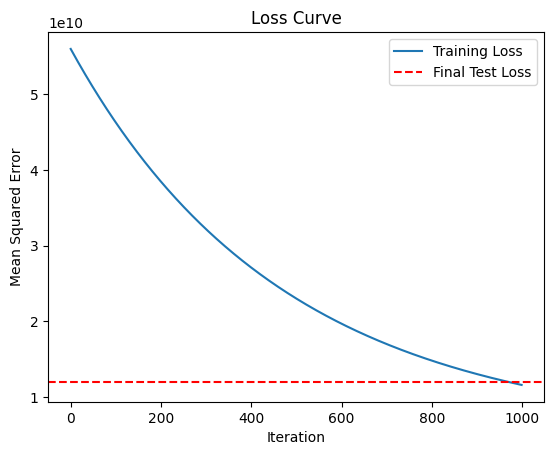

Final Test Loss: 12080399570.004505
4087


In [12]:

selected_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'NEARBAY', '<1H OCEAN', 'INLAND', 'NEAROCEAN', 'ISLAND', 'housing_median_age', 'median_income']

# Data Scaling
X = dataset[selected_features]
y = dataset['median_house_value']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred_test = lr.predict(X_test)
test_loss = lr.mse(y_test, y_pred_test)

# Predict on train data
y_pred_train = lr.predict(X_train)
train_loss = lr.mse(y_train, y_pred_train)

# Plot the loss curve for training data
plt.plot(range(lr.num_of_iterations), lr.losses, label='Training Loss')

# Annotate the final test loss on the same plot
plt.axhline(y=test_loss, color='r', linestyle='--', label='Final Test Loss')

plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Print out the final test loss
print("Final Test Loss:", test_loss)
print(y_test.size)

# Part 4: Linear Regression with Regularization 

Now that you have succesfully implemented Linear Regression from scratch, the next order of business is to use `Regularization` to see if we can acheive better results.

In this part you will need to use different regularization techniques to see if the RMSE can be reduced and which one offers the best results. The main types are `Ridge`, `Lasso` and `Elastic Net` which we expect you to use. The documentation for these methods can be found [here](https://scikit-learn.org/stable/modules/linear_model.html).

Make sure that you print out the scores for each of the techniques as this will help you in answering the question that comes up next.

In [13]:
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value'] 

# Splitting the dataset into training and testing sets
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [14]:
def RMSE(goldLabels, prediction):
    # converting to np arrays
    goldLabels = np.array(goldLabels)
    prediction = np.array(prediction)

    # calculating mse
    residuals = goldLabels - prediction
    residuals = residuals ** 2
    mse = np.mean(residuals)

    # calculating rmse
    rmse = np.sqrt(mse)
    
    return rmse
    

In [15]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

alpha = 37 # optimal value at which convergence error is mitigated. Going lower returns convergence error.
train_rmses = {}
test_rmses = {}

# RIDGE
ridgeRegression = Ridge(alpha=alpha)
ridgeRegression.fit(X_train, y_train)

trainPredictions = ridgeRegression.predict(X_train)
train_rmses['Ridge'] = RMSE(y_train, trainPredictions)

testPredictions = ridgeRegression.predict(X_test)
test_rmses['Ridge'] = RMSE(y_test, testPredictions)

# LASSO
lassoRegression = Lasso(alpha=alpha)
lassoRegression.fit(X_train, y_train)

trainPredictions = lassoRegression.predict(X_train)
train_rmses['Lasso'] = RMSE(y_train, trainPredictions)

testPredictions = lassoRegression.predict(X_test)
test_rmses['Lasso'] = RMSE(y_test, testPredictions)

# ELASTIC-NET
elasticNetRegression = ElasticNet(alpha=alpha)
elasticNetRegression.fit(X_train, y_train)

trainPredictions = elasticNetRegression.predict(X_train)
train_rmses['ElasticNet'] = RMSE(y_train, trainPredictions)

testPredictions = elasticNetRegression.predict(X_test)
test_rmses['ElasticNet'] = RMSE(y_test, testPredictions)


print("Train RMSEs: ", train_rmses)
print()
print("Test RMSEs: ", test_rmses)

Train RMSEs:  {'Ridge': 68496.4187279083, 'Lasso': 68488.42631792995, 'ElasticNet': 110132.91562099273}

Test RMSEs:  {'Ridge': 69309.52723475957, 'Lasso': 69299.39252399853, 'ElasticNet': 111952.67130481637}


Conclusion of comparision of  regularization techniques : 

- Lasso regression resulted in the best overall RMSE scores.

Using any regularization we will be plotting the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis).

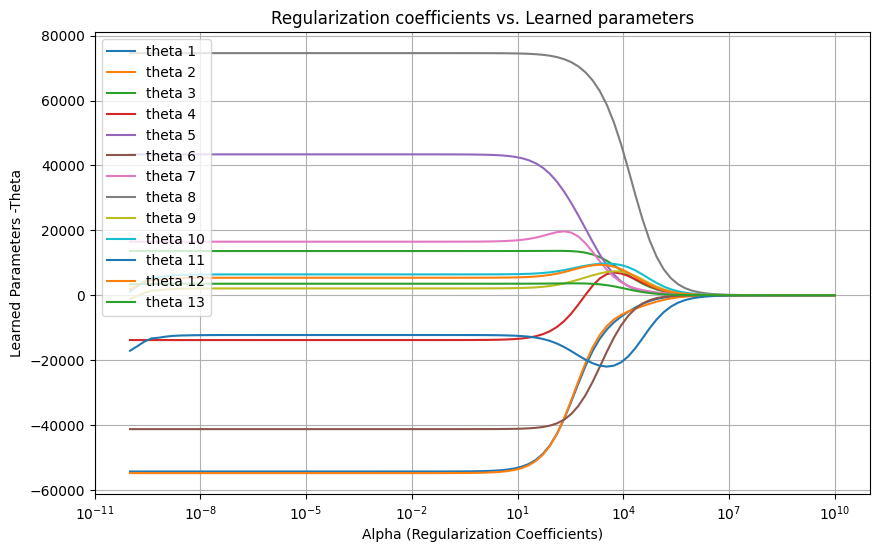

In [16]:

alpha_vals = np.logspace(-10, 10, 100)

theta_values = []

for i in alpha_vals:
    model = Ridge(alpha=i)
    model.fit(X_train, y_train)  
    theta_values.append(model.coef_)


theta_values = np.array(theta_values)
plt.figure(figsize=(10, 6))
for i in range(theta_values.shape[1]):
    plt.plot(alpha_vals, theta_values[:, i], label=f'theta {i+1}')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Coefficients)')
plt.ylabel('Learned Parameters -Theta')
plt.title('Regularization coefficients vs. Learned parameters')
plt.legend()
plt.grid(True)
plt.show()


As this is Lasso regression, we observe all of the weights going down to zero at some point. 

The graph shows how our learned coefficients' magnitudes change with increasing the regularisation coefficient, alpha.

Essentially, the magnitudes will decrease as alpha is increased because a higher penality is applied to coefficients to reduce overfitting and improve generalisability. 

Those weights that are zeroed first are observed to be either least relevant to the model's prediction accuracy, or the lasso regression model identifies multicollinearity between some features and zeros some of those coefficients to reduce redundancy and increase generalisability in the model. We can also see that some coefficients will not go to zero so easily, like the blue and brown coefficients in the graph. This shows that these are coefficients of features that are most important for the model's accuracy and correct predictions, i.e, these feature variables are most informative for a correct prediction.



# Part 5: Polynomial Regression 

Now we will make use of the `Moore Penrose Psuedoinverse` to find the optimal weights for a linear regression model and compare them with those generated by a library. Lastly we will compare the RMSE of both approaches to see if the answer match.


$\theta = (X^{T}X)^{-1}X^{T}y$



In [17]:
def RMSE(goldLabels, prediction):
    # converting to np arrays
    goldLabels = np.array(goldLabels)
    prediction = np.array(prediction)

    # calculating mse
    residuals = goldLabels - prediction
    residuals = residuals ** 2
    mse = np.mean(residuals)

    # calculating rmse
    rmse = np.sqrt(mse)
    
    return rmse

def pseudoinverse(X):
    return np.linalg.pinv(X)

In [18]:
X_train_w_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_w_bias = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
# Pseudo-inverse model
optimalWeights = np.dot(pseudoinverse(X_train_w_bias), y_train)

pTrainPredictions = np.dot(X_train_w_bias, optimalWeights)
pTrainLoss = RMSE(y_train, pTrainPredictions)

pTestPredictions = np.dot(X_test_w_bias, optimalWeights)
pTestLoss = RMSE(y_test, pTestPredictions)

print("*** Pseudoinverse Model ***")
print("Train loss: ", pTrainLoss)
print("Test loss: ", pTestLoss)

print()
# OLS
ols = sm.OLS(y_train, X_train_w_bias)
results = ols.fit()

oTrainPredictions = results.predict(X_train_w_bias)
oTrainLoss = RMSE(y_train, oTrainPredictions)

oTestPredictions = results.predict(X_test_w_bias)
oTestLoss = RMSE(y_test, oTestPredictions)

print("*** OLS Model ***")
print("Train loss: ", oTrainLoss)
print("Test loss: ", oTestLoss)





*** Pseudoinverse Model ***
Train loss:  68517.36930500992
Test loss:  69288.24586047244

*** OLS Model ***
Train loss:  68517.36930500992
Test loss:  69288.24586047244


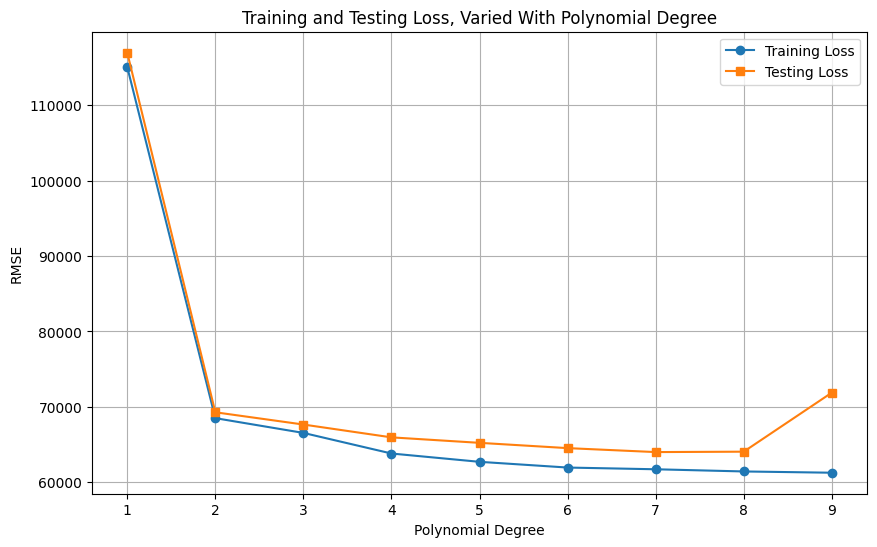

In [19]:
def polynomialiseFeatures(X, degree):
    X = np.array(X)
    n_samples, n_features = X.shape

    X_polynomial = np.ones((n_samples, 1))

    for i in range(0, degree):
        for feature_idx in range(n_features):
            new_feature = X[:, feature_idx] ** i
            X_polynomial = np.hstack((X_polynomial, new_feature.reshape(-1, 1)))

    return X_polynomial


train_losses = []
test_losses = []
degrees = range(1, 10) 

for degree in degrees:
    # Generating the polynomial featureset
    X_train_polyonmialised = polynomialiseFeatures(X_train, degree)
    X_test_polyonmialised = polynomialiseFeatures(X_test, degree)
    
    # Compute optimal weights
    pseudo_inverse = pseudoinverse(X_train_polyonmialised)
    optimal_weights = np.dot(pseudo_inverse, y_train)
    
    # Calculate predictions
    polyTrainPredictions = np.dot(X_train_polyonmialised, optimal_weights)
    polyTestPredictions = np.dot(X_test_polyonmialised, optimal_weights)
    
    # Compute and store RMSE
    train_loss = RMSE(y_train, polyTrainPredictions)
    test_loss = RMSE(y_test, polyTestPredictions)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_losses, label='Training Loss', marker='o')
plt.plot(degrees, test_losses, label='Testing Loss', marker='s')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Training and Testing Loss, Varied With Polynomial Degree')

plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Return best degree, observed at lowest test rmse
best_degree = degrees[np.argmin(test_losses)]
print(f"Optimal  polynomial degree that reduces the overall error: {best_degree}")

Optimal  polynomial degree that reduces the overall error: 7


7 reduces the overall error, as when you increase the degree further, you see a subtle increase in test loss (from 7 to 8) and a large jump in test loss from 8 to 9. After 7th degree, the polynomial model will begin to overfit and become overly complex, leading to reduced generalisability.